## Gaussian Processes


Imagine you're trying to predict the temperature over the next week. Instead of committing to one specific prediction curve, you acknowledge that many possible curves could fit past temperature data and make reasonable future predictions. Each of these curves represents a different potential reality, and some are more likely than others based on the data you've observed. A distribution over functions is a mathematical way to capture this range of possibilities and their associated likelihoods.

In a GP, instead of assuming a particular form for the underlying function (like a linear or polynomial function in regression), we assume that the function's values follow a multivariate Gaussian distribution.

### Distribution Over Functions

A GP defines a distribution over functions, such that any collection of function values has a joint Gaussian distribution. This means (mean function often taken as zero for simplicity) and the covariance function (Kernel) are central. 

### Covariance Function (Kernel)
The covariance function, determines the "shape" of the functions in the distribution, and encodes our assumptions about the function, such as smoothness, periodicity, and how quickly it can vary. 

we can specify our beliefs about the function's behavior (e.g., smoothness, periodicity) via a mean function and a covariance function (or kernel).







### Basic Idea
The basic idea behind Gaussian Processes is to assume that the function you're trying to learn has some smoothness properties. Given a set of input-output pairs $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$, a Gaussian Process uses these to make predictions $y^*$ for new input points $x^*$.

### Mathematical Formulation

A Gaussian Process is fully specified by a mean function $m(x)$ and a covariance function $k(x, x')$:

$
GP(m(x), k(x, x'))
$

The mean function $m(x)$ is often set to zero for simplicity, and the focus is usually on the covariance function $k(x, x')$, which encodes our assumptions about the function we're trying to learn. The most commonly used covariance function is the Radial Basis Function (RBF) or Gaussian kernel:

$
k(x, x') = \sigma^2 \exp\left(-\frac{(x - x')^2}{2l^2}\right)
$

Here, $\sigma^2$ is the signal variance and $l$ is the length scale.



## Gaussian Process Regression 

The theory behind Gaussian Process Regression (GPR) and how it can be applied to solve a problem like the age-height relationship from scratch. 

### Step 1: Define the GP Prior

A GP is fully specified by its mean function $m(\mathbf{x})$ and covariance function $k(\mathbf{x}, \mathbf{x}')$, where $\mathbf{x}$ and $\mathbf{x}'$ are points in the input space. In many applications, the mean function is assumed to be zero, $m(\mathbf{x}) = 0$, for simplicity, unless there's a reason to choose otherwise.

The covariance function, or kernel, $k(\mathbf{x}, \mathbf{x}')$, defines the similarity between points in the input space. A common choice is the Radial Basis Function (RBF) or Gaussian kernel:

$
k(\mathbf{x}, \mathbf{x}') = \sigma_f^2 \exp\left(-\frac{||\mathbf{x} - \mathbf{x}'||^2}{2l^2}\right)
$

where $\sigma_f^2$ is the variance parameter that controls the overall variance of the functions and $l$ is the length scale parameter that controls how quickly the correlation between two points decreases with distance.

### Step 2: Compute the Covariance Matrices

Given a set of $n$ training inputs $X$ and a set of $m$ test inputs $X_*$, we calculate the covariance matrices $K(X, X)$, $K(X, X_*)$, and $K(X_*, X_*)$, using the chosen kernel function. $K(X, X)$ is the covariance matrix of the training inputs, $K(X, X_*)$ is the covariance matrix between the training inputs and test inputs, and $K(X_*, X_*)$ is the covariance matrix of the test inputs.

### Step 3: Make Predictions

The GP prior combined with the observed training data $(X, y)$ allows us to compute the posterior distribution over functions. The mean and covariance of the predictive distribution of a new test point $\mathbf{x}_*$ are given by:

- **Predictive Mean**:
$
\bar{\mathbf{f}}_* = K(X_*, X) [K(X, X) + \sigma_n^2I]^{-1}y
$

- **Predictive Covariance**:
$
\text{cov}(\mathbf{f}_*) = K(X_*, X_*) - K(X_*, X) [K(X, X) + \sigma_n^2I]^{-1}K(X, X_*)
$

where $\sigma_n^2$ is the noise variance of the observations, and $I$ is the identity matrix. This noise term is added to the diagonal of $K(X, X)$ to account for the observation noise.

### Example: Age-Height Prediction
A simplified numerical example to manually compute the Gaussian Process Regression (GPR) predictions for the age-height relationship.
### Dataset

Suppose our dataset consists of ages (years) and corresponding heights (meters) as follows:

- $X = \{2, 4\}$ (input ages)
- $y = \{0.5, 1.0\}$ (output heights)

We wish to predict the height at age $X_* = \{3\}$.

### Kernel Selection

We'll use the squared exponential kernel (Gaussian kernel) with $\sigma_f^2 = 1$ (variance parameter) and $l = 1$ (length scale), and we'll assume a small observational noise variance, $\sigma_n^2 = 0.1$, for simplicity.




### Step 1: Kernel Function

The kernel function for two points $x$ and $x'$ is given by:

$
k(x, x') = \exp\left(-\frac{(x - x')^2}{2}\right)
$



### Step 2: Compute Covariance Matrices

 

1. $K(X, X) = 
\begin{bmatrix}
k(2, 2) & k(2, 4) \\
k(4, 2) & k(4, 4) \\
\end{bmatrix}
=
\begin{bmatrix}
1 & e^{-2} \\
e^{-2} & 1 \\
\end{bmatrix}$



2. $K(X, X_*) = K(X_*, X)^T = 
\begin{bmatrix}
k(2, 3) \\
k(4, 3) \\
\end{bmatrix}
=
\begin{bmatrix}
e^{-0.5} \\
e^{-0.5} \\
\end{bmatrix}$



3. $K(X_*, X_*) =
\begin{bmatrix}
k(3, 3) \\
\end{bmatrix}
=
\begin{bmatrix}
1 \\
\end{bmatrix}$


### Step 3: Predictive Mean and Covariance
#### Predictive Mean
The predictive mean for a new input $X_*$ (age = 3) using the Gaussian Process is given by:

$
\bar{y}_* = K(X_*, X) [K(X, X) + \sigma_n^2I]^{-1}y
$

Given our previous calculations:

- $K(X, X)$ was calculated as $\begin{bmatrix} 1 & e^{-2} \\ e^{-2} & 1 \end{bmatrix}$
- $K(X, X_*)$ (same as $K(X_*, X)^T$) was calculated as $\begin{bmatrix} e^{-0.5} & e^{-0.5} \end{bmatrix}$
- $\sigma_n^2 = 0.1$ and $I$ is the identity matrix of appropriate size.
- $y = \begin{bmatrix} 0.5 & 1.0 \end{bmatrix}^T$

Substituting the values:

$
\bar{y}_* = \begin{bmatrix} e^{-0.5} & e^{-0.5} \end{bmatrix} \left(\begin{bmatrix} 1 & e^{-2} \\ e^{-2} & 1 \end{bmatrix} + 0.1 \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\right)^{-1} \begin{bmatrix} 0.5 \\ 1.0 \end{bmatrix}
$

#### Predictive Covariance
The predictive covariance for $X_*$ is calculated as:

$
\text{cov}(y_*) = K(X_*, X_*) - K(X_*, X) [K(X, X) + \sigma_n^2I]^{-1}K(X, X_*)
$

Given our previous calculations:

- $K(X_*, X_*) = 1$ (since it's the kernel of $X_*$ with itself)
- The rest of the terms have been defined previously.

Substituting the values:

$
\text{cov}(y_*) = 1 - \begin{bmatrix} e^{-0.5} & e^{-0.5} \end{bmatrix} \left(\begin{bmatrix} 1 & e^{-2} \\ e^{-2} & 1 \end{bmatrix} + 0.1 \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\right)^{-1} \begin{bmatrix} e^{-0.5} \\ e^{-0.5} \end{bmatrix}
$

These equations represent how the predictive mean and covariance are derived from the Gaussian Process model. They encapsulate the process of updating our beliefs about the underlying function (from the prior to the posterior) based on observed data. The predictive mean gives us the expected height at age 3, while the predictive covariance provides a measure of uncertainty around this prediction.

### Example 1: Gaussian Process for Regression

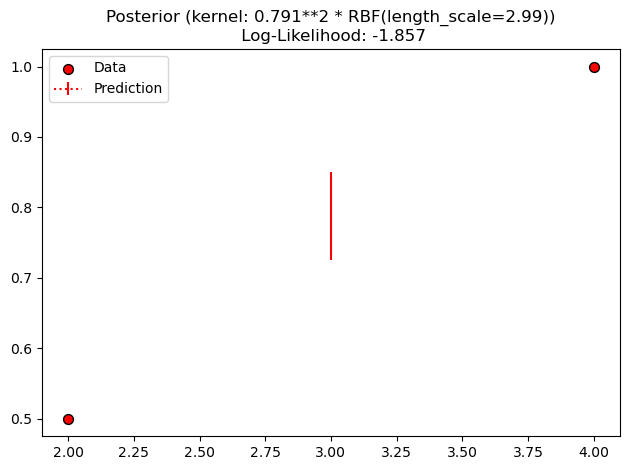

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Given data
X = np.array([[2], [4]])  # Reshaping X to 2D array for compatibility with GP
y = np.array([0.5, 1.0])

# Define kernel (RBF kernel with constant term)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create GaussianProcessRegressor object
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP model
gp.fit(X, y)

# Predict for new data points
x_pred = np.array([[3]])  # Reshaping x_pred to 2D array for compatibility
y_pred, sigma = gp.predict(x_pred, return_std=True)

# Plot the results
plt.figure()
plt.errorbar(x_pred.ravel(), y_pred, sigma, fmt='r:', label='Prediction')
plt.scatter(X.ravel(), y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label='Data')
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
          % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
          fontsize=12)
plt.tight_layout()
plt.legend()

plt.show()


## Visualizing the output of a Gaussian Process (GP)


Visualizing the output of a Gaussian Process (GP) for regression typically involves plotting not just the predictions but also the uncertainty associated with those predictions across the domain of interest. The uncertainty is captured by the standard deviation (or variance) of the predictions, which the GP model provides. Here’s a step-by-step guide on how to do it:

1. **Plot the Mean Prediction**: First, plot the mean prediction of the GP model across your domain of interest. This gives you the expected value of the function at each point.

2. **Shade the Uncertainty**: The GP provides a measure of uncertainty (standard deviation) at each point. You can visualize this uncertainty by shading the area around the mean prediction. Typically, you might shade one or two standard deviations above and below the mean to show where you expect the true function to lie with high probability.

3. **Plot the Observations**: It's also helpful to plot the actual observations (data points) that you used to fit the GP model. This gives context to the predictions and the uncertainty.

Let’s modify the previous example to include a visualization of the uncertainty across a range of new data points, not just a single point.


- The **black line** represents the mean prediction of the Gaussian Process across the range from 0 to 5. This is our best guess at the underlying function based on the data and the GP model.
  
- The **shaded area** around the mean prediction represents the uncertainty of the model, specifically ±2 standard deviations from the mean. The width of the shaded area indicates the level of uncertainty: a wider area means more uncertainty at that point.

- The **red dots** are the original data points that were used to fit the GP model. These anchor the model and are where the model has the least uncertainty.

This visualization is crucial for understanding both the predictions and the model’s confidence in those predictions across different parts of the input space.


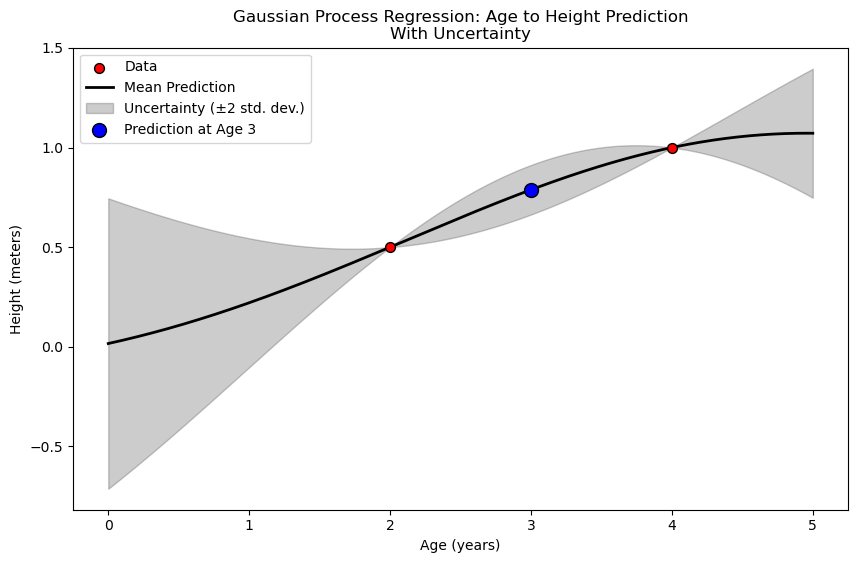

In [6]:
# Dataset consisting of ages and corresponding heights
X_ages = np.array([[2], [4]])  # Input ages, reshaped to 2D array for compatibility
y_heights = np.array([0.5, 1.0])  # Output heights

# Fit the GP model to the dataset of ages and heights
gp.fit(X_ages, y_heights)

# Define new data points for prediction over a range of ages
x_ages_range = np.atleast_2d(np.linspace(0, 5, 1000)).T

# Predict using the fitted GP model
y_ages_range_pred, sigma_ages_range = gp.predict(x_ages_range, return_std=True)

# Predict specifically at age 3
x_age_3 = np.array([[3]])
y_age_3_pred, sigma_age_3 = gp.predict(x_age_3, return_std=True)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the data points (ages and heights)
plt.scatter(X_ages.ravel(), y_heights, c='r', s=50, zorder=10, edgecolors='k', label='Data')

# Plot the mean prediction
plt.plot(x_ages_range.ravel(), y_ages_range_pred, 'k-', lw=2, zorder=9, label='Mean Prediction')

# Shade two standard deviation intervals around the mean prediction
plt.fill_between(x_ages_range.ravel(), y_ages_range_pred - 2*sigma_ages_range,
                 y_ages_range_pred + 2*sigma_ages_range, alpha=0.2, color='k', 
                 label='Uncertainty (±2 std. dev.)')

# Highlight the prediction at age 3
plt.scatter(x_age_3.ravel(), y_age_3_pred, c='b', s=100, zorder=11, edgecolors='k', label='Prediction at Age 3')

plt.title("Gaussian Process Regression: Age to Height Prediction\nWith Uncertainty")
plt.xlabel("Age (years)")
plt.ylabel("Height (meters)")
plt.legend()

plt.show()


Another example:

The expression `kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))` defines a composite kernel for the Gaussian Process.




1. **RBF Kernel (Radial Basis Function or Gaussian Kernel)**:
   - Defined as: $ k(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2l^2}\right) $
   - It has a parameter $ l $ which is the length scale. The length scale determines how sensitive the kernel is to changes in input space. A small length scale means that the function values can change quickly, leading to a "wiggly" function. A large length scale results in a smoother function.
   - In the code, `RBF(1.0, (1e-2, 1e2))` initializes the RBF kernel with a length scale of 1.0. The tuple `(1e-2, 1e2)` provides a constraint on the length scale during optimization, meaning it will be optimized within the range [0.01, 100].

2. **Constant Kernel (C)**:
   - Defined as: $ k(x, x') = c^2 $
   - It has a parameter $ c $ which scales the magnitude of the covariance. This can be thought of as a vertical scaling of the function.
   - In the code, `C(1.0, (1e-3, 1e3))` initializes the constant kernel with a value of 1.0. The tuple `(1e-3, 1e3)` provides a constraint on the constant term during optimization, meaning it will be optimized within the range [0.001, 1000].

3. **Composite Kernel**:
   - The `*` operator between the two kernels means that the kernels are multiplied together. This results in a new kernel function that combines the properties of both.
   - The composite kernel is defined as: $ k(x, x') = c^2 \times \exp\left(-\frac{\|x - x'\|^2}{2l^2}\right) $

### What happens during GP fitting?

When you fit a Gaussian Process with this composite kernel to data:

1. The GP will try to optimize the hyperparameters $ c $ and $ l $ to best fit the data. This optimization is done within the bounds provided.
   
2. The composite kernel will compute the similarity between data points considering both the RBF and constant terms. The RBF part captures the shape or structure of the function, while the constant part scales its magnitude.

3. The resulting GP regression model will have properties influenced by both kernels. The RBF part will determine how "wiggly" or smooth the function is, and the constant part will determine its vertical scale.

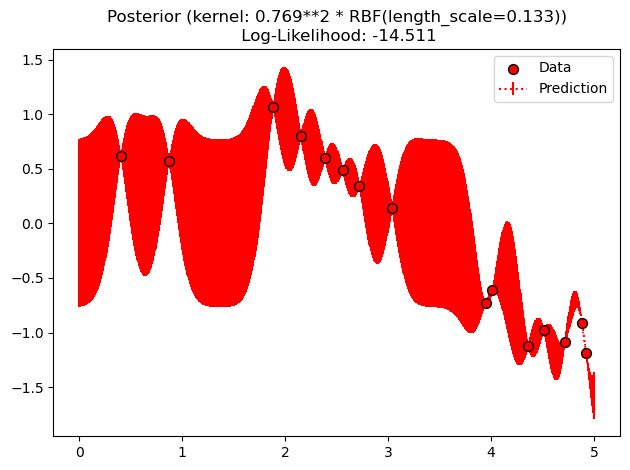

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generate synthetic data
rng = np.random.default_rng(seed=4)
X = np.sort(5 * rng.random(15))[:, np.newaxis]
y = np.sin(X).ravel()
y += 0.1 * rng.normal(size=X.shape[0])  # Add noise

# Define kernel (RBF kernel with constant term)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Create GaussianProcessRegressor object
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the GP model
gp.fit(X, y)

# Predict for new data points
x_pred = np.atleast_2d(np.linspace(0, 5, 1000)).T
y_pred, sigma = gp.predict(x_pred, return_std=True)

# Plot the results
plt.figure()
plt.errorbar(x_pred.ravel(), y_pred, sigma, fmt='r:', label='Prediction')
plt.scatter(X.ravel(), y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label='Data')
plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
          % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
          fontsize=12)
plt.tight_layout()
plt.legend()

plt.show()

# Gaussian Processes In SLAM
In Simultaneous Localization and Mapping (SLAM) using Gaussian Processes (GPs), the core idea is to model the map of an environment as a Gaussian Process and simultaneously estimate the trajectory of the robot. This approach typically involves representing the environment's features or the robot's path as a continuous function over space, where the function values (e.g., the presence of an obstacle or the robot's location) at any point can be predicted using GP regression.

A Gaussian Process is defined by its mean function $m(\mathbf{x})$ and covariance function $k(\mathbf{x}, \mathbf{x}')$, where $\mathbf{x}$ and $\mathbf{x}'$ are points in the input space (e.g., positions in an environment). The GP prior is given by:

$ f(\mathbf{x}) \sim \mathcal{GP}(m(\mathbf{x}), k(\mathbf{x}, \mathbf{x}')) $

For SLAM, we often deal with estimating a function $f$ that represents the map or the robot's trajectory, based on noisy observations $\mathbf{y}$ at locations $\mathbf{X}$. The observations are related to the function values by some noise $\epsilon$, typically assumed to be Gaussian:

$ \mathbf{y} = f(\mathbf{X}) + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma_n^2\mathbf{I}) $

Given a set of $N$ training points $\mathbf{X}$ and their corresponding observations $\mathbf{y}$, the goal is to predict the value of the function $f$ at a new set of points $\mathbf{X}_*$. The joint distribution of the observed outputs $\mathbf{y}$ and the function values $f_*$ at the new points $\mathbf{X}_*$ under the GP model is:

$
\begin{bmatrix}
\mathbf{y} \\
f_*
\end{bmatrix}
\sim \mathcal{N} \left(
\mathbf{0},
\begin{bmatrix}
K(\mathbf{X}, \mathbf{X}) + \sigma_n^2\mathbf{I} & K(\mathbf{X}, \mathbf{X}_*) \\
K(\mathbf{X}_*, \mathbf{X}) & K(\mathbf{X}_*, \mathbf{X}_*)
\end{bmatrix}
\right)
$

where $K(\mathbf{X}, \mathbf{X})$ is the covariance matrix computed using the covariance function $k(\mathbf{x}, \mathbf{x}')$ for all pairs of training points, $K(\mathbf{X}, \mathbf{X}_*)$ is the covariance matrix between the training points and the new points, and $\sigma_n^2$ is the variance of the observation noise.

The prediction for $f_*$ at the new points $\mathbf{X}_*$, given the observations $\mathbf{y}$, follows a Gaussian distribution with the posterior mean and covariance given by:

$ \mathbb{E}[f_*|\mathbf{X}, \mathbf{y}, \mathbf{X}_*] = K(\mathbf{X}_*, \mathbf{X})[K(\mathbf{X}, \mathbf{X}) + \sigma_n^2\mathbf{I}]^{-1}\mathbf{y} $

$ \text{Cov}[f_*|\mathbf{X}, \mathbf{y}, \mathbf{X}_*] = K(\mathbf{X}_*, \mathbf{X}_*) - K(\mathbf{X}_*, \mathbf{X})[K(\mathbf{X}, \mathbf{X}) + \sigma_n^2\mathbf{I}]^{-1}K(\mathbf{X}, \mathbf{X}_*) $



## A Visual Exploration of Gaussian Processes

![](https://distill.pub/2019/visual-exploration-gaussian-processes/)
Ref: [1](https://distill.pub/2019/visual-exploration-gaussian-processes/)